In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_excel('/kaggle/input/databert/nhsdata.xlsx',sheet_name='Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16229 entries, 0 to 16228
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diseases  16229 non-null  object
 1   Sym_1     16229 non-null  object
 2   Sym_2     16229 non-null  object
 3   Sym_3     16229 non-null  object
 4   Sym_5     16229 non-null  object
 5   Sym_6     13312 non-null  object
 6   Sym_7     16229 non-null  object
 7   Directed  16229 non-null  object
dtypes: object(8)
memory usage: 1014.4+ KB


In [4]:
#df=pd.read_excel('dataset-19.xlsx',sheet_name='Datanew')
df.shape[1]

8

In [5]:
X=df.drop(columns=['Directed'])
y=df['Directed']
df

,Diseases,Sym_1,Sym_2,Sym_3,Sym_5,Sym_6,Sym_7,Directed
0,Book a gp appointment or get health advice,finger pain,less than 24 hrs,not tried,none,none,doing regular activities,pharmacy
1,Book a gp appointment or get health advice,finger pain,longer than 24 hrs,not tried,none,none,doing regular activities,pharmacy
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,not tried,none,none,doing regular activities,pharmacy
3,Book a gp appointment or get health advice,finger pain,less than 24 hrs,paracetamol,none,none,doing regular activities,pharmacy
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hrs,paracetamol,none,none,doing regular activities,physio
...,...,...,...,...,...,...,...,...
16224,Need help with MH,head ache,longer than 24 hrs,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health
16225,Need help with MH,head ache,long term or intermittent,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health
16226,Need help with MH,head ache,less than 24 hrs,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health
16227,Need help with MH,head ache,longer than 24 hrs,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health


<AxesSubplot:>

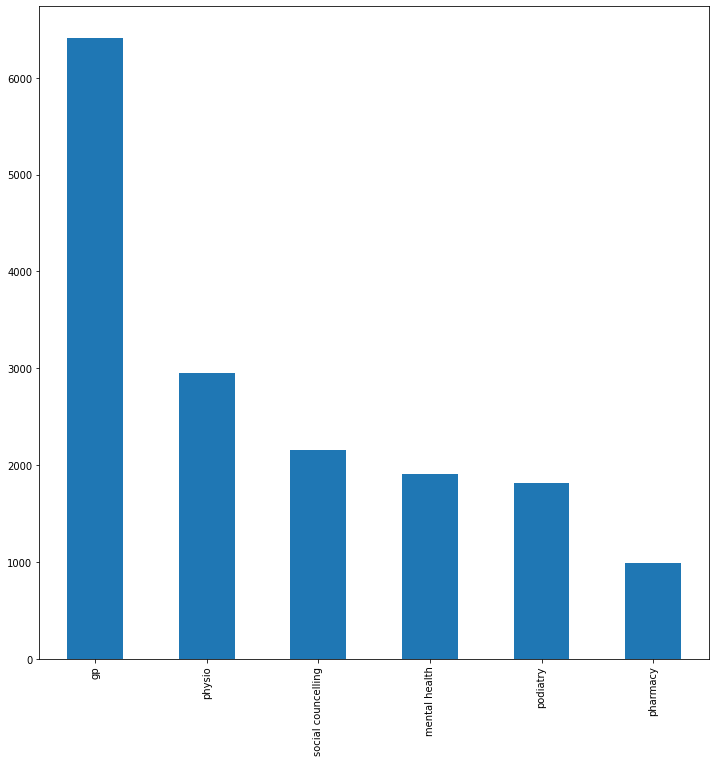

In [6]:
plt.figure(figsize=(12,12))
df.Directed.value_counts().plot(kind='bar')

In [7]:
#Renaming col names
list1=[i for i in range(df.shape[1])]
new_Index=[str(i) for i in list1]
df.columns=new_Index
df.head()


,0,1,2,3,4,5,6,7
0,Book a gp appointment or get health advice,finger pain,less than 24 hrs,not tried,none,none,doing regular activities,pharmacy
1,Book a gp appointment or get health advice,finger pain,longer than 24 hrs,not tried,none,none,doing regular activities,pharmacy
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,not tried,none,none,doing regular activities,pharmacy
3,Book a gp appointment or get health advice,finger pain,less than 24 hrs,paracetamol,none,none,doing regular activities,pharmacy
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hrs,paracetamol,none,none,doing regular activities,physio


In [8]:
leng=df.shape[1]
df['Symptoms']=''
symp=[]
for i in range(len(df)) :
    symp.append(' '.join(str(x) for x in df.iloc[i,0:leng-1]))
    
for i in range(len(df)):
    df['Symptoms'][i]=symp[i]
df

,0,1,2,3,4,5,6,7,Symptoms
0,Book a gp appointment or get health advice,finger pain,less than 24 hrs,not tried,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
1,Book a gp appointment or get health advice,finger pain,longer than 24 hrs,not tried,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
2,Book a gp appointment or get health advice,finger pain,long term or intermittent,not tried,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
3,Book a gp appointment or get health advice,finger pain,less than 24 hrs,paracetamol,none,none,doing regular activities,pharmacy,Book a gp appointment or get health advice fin...
4,Book a gp appointment or get health advice,wrist pain my wrists hurt,longer than 24 hrs,paracetamol,none,none,doing regular activities,physio,Book a gp appointment or get health advice wri...
...,...,...,...,...,...,...,...,...,...
16224,Need help with MH,head ache,longer than 24 hrs,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with MH head ache longer than 24 hrs...
16225,Need help with MH,head ache,long term or intermittent,any other mood stabilisers,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with MH head ache long term or inter...
16226,Need help with MH,head ache,less than 24 hrs,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with MH head ache less than 24 hrs b...
16227,Need help with MH,head ache,longer than 24 hrs,benzodiazepines,feeling depressed or low,avoiding social situations,little to no interest in doing activities,mental health,Need help with MH head ache longer than 24 hrs...


In [9]:
df=df[[f'{leng-1}','Symptoms']].copy()
df.head()
#df.iloc[0]
df.Symptoms[0]

'Book a gp appointment or get health advice finger pain less than 24 hrs not tried none none doing regular activities'

In [10]:
data=df.rename({f'{leng-1}':'Department','Symptoms':'Symptoms'},axis=1)
data

,Department,Symptoms
0,pharmacy,Book a gp appointment or get health advice fin...
1,pharmacy,Book a gp appointment or get health advice fin...
2,pharmacy,Book a gp appointment or get health advice fin...
3,pharmacy,Book a gp appointment or get health advice fin...
4,physio,Book a gp appointment or get health advice wri...
...,...,...
16224,mental health,Need help with MH head ache longer than 24 hrs...
16225,mental health,Need help with MH head ache long term or inter...
16226,mental health,Need help with MH head ache less than 24 hrs b...
16227,mental health,Need help with MH head ache longer than 24 hrs...


<AxesSubplot:>

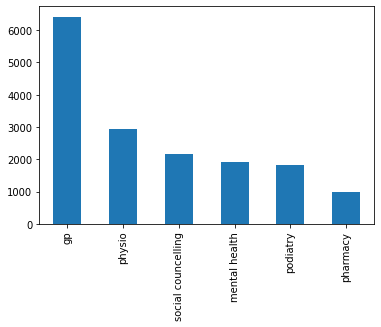

In [11]:
data.Department.value_counts().plot(kind='bar')

## Removing nan and stopwords

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
corpus=[]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub('nan', '',text)
    text = re.sub('_', ' ',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
data['Symptoms'] = data['Symptoms'].apply(clean_text)

## Check no. of words 

In [14]:
data['Symptoms'].apply(lambda x: len(x.split(' '))).sum()
data

,Department,Symptoms
0,pharmacy,book gp appointment get health advice finger p...
1,pharmacy,book gp appointment get health advice finger p...
2,pharmacy,book gp appointment get health advice finger p...
3,pharmacy,book gp appointment get health advice finger p...
4,physio,book gp appointment get health advice wrist pa...
...,...,...
16224,mental health,need help mh head ache longer 24 hrs mood stab...
16225,mental health,need help mh head ache long term intermittent ...
16226,mental health,need help mh head ache less 24 hrs benzodiazep...
16227,mental health,need help mh head ache longer 24 hrs benzodiaz...


In [15]:
data['Symptoms'][0]

'book gp appointment get health advice finger pain less 24 hrs tried none none regular activities'

## Encoding the labels

In [16]:
possible_labels = data.Department.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'pharmacy': 0,
 'physio': 1,
 'gp': 2,
 'podiatry': 3,
 'mental health': 4,
 'social councelling': 5}

In [17]:
data['label'] = data.Department.replace(label_dict)
data

,Department,Symptoms,label
0,pharmacy,book gp appointment get health advice finger p...,0
1,pharmacy,book gp appointment get health advice finger p...,0
2,pharmacy,book gp appointment get health advice finger p...,0
3,pharmacy,book gp appointment get health advice finger p...,0
4,physio,book gp appointment get health advice wrist pa...,1
...,...,...,...
16224,mental health,need help mh head ache longer 24 hrs mood stab...,4
16225,mental health,need help mh head ache long term intermittent ...,4
16226,mental health,need help mh head ache less 24 hrs benzodiazep...,4
16227,mental health,need help mh head ache longer 24 hrs benzodiaz...,4


## Perform train test split 

In [18]:
X=data.Symptoms
y=data.Department

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.index.values, 
                                                  data.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=data.label.values)

data['data_type'] = ['not_set']*data.shape[0]

data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'

data.groupby(['Department', 'label', 'data_type']).count()

Symptoms
Department         label data_type          
gp                 2     train          5453
                         val             963
mental health      4     train          1622
                         val             286
pharmacy           0     train           838
                         val             148
physio             1     train          2506
                         val             442
podiatry           3     train          1539
                         val             272
social councelling 5     train          1836
                         val             324

In [19]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
#import tensorflow_text as text

## Transform to vector using bert

In [20]:
import numpy as np
seq_len=512
num_samples=len(data)

Xids=np.zeros((num_samples,seq_len))
Xmask=np.zeros((num_samples,seq_len))

Xids.shape

(16229, 512)

In [21]:
from transformers import BertTokenizer

In [22]:
tokenizer= BertTokenizer.from_pretrained('bert-base-cased')

for i,phrase in enumerate(data['Symptoms']):
    tokens=tokenizer.encode_plus(phrase,max_length=seq_len,truncation=True,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    Xids[i,:]=tokens['input_ids']
    Xmask[i,:]=tokens['attention_mask']

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

2022-09-11 18:19:42.400045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-11 18:19:42.549364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-11 18:19:42.550197: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-11 18:19:42.553281: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [23]:
Xids#

array([[ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       [ 101., 1520.,  176., ...,    0.,    0.,    0.],
       ...,
       [ 101., 1444., 1494., ...,    0.,    0.,    0.],
       [ 101., 1444., 1494., ...,    0.,    0.,    0.],
       [ 101., 1444., 1494., ...,    0.,    0.,    0.]])

In [24]:
Xmask#control for the attention layer within bert

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [25]:
#one hot encoding dept labels 
dept_labels = data['label'].values
dept_labels

array([0, 0, 0, ..., 4, 4, 4])

In [26]:
labels = np.zeros((num_samples,dept_labels.max()+1))
labels.shape

(16229, 6)

In [27]:
labels[np.arange(num_samples),dept_labels]=1

In [28]:
labels

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

## Changing format into format for bert i/p


In [29]:
dataset= tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))
dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (6,)), types: (tf.float64, tf.float64, tf.float64)>

## Merging Xids and Xmask (i/p tensors) into a single dictionary(tf expects i/p with index 0 as i/p and index 1 as target 

In [30]:
def map_func(input_ids,masks,labels):
    return {'input_ids':input_ids,'attention_mask':masks},labels

In [31]:
dataset=dataset.map(map_func)

In [32]:
dataset.take(1)

<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (6,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [33]:
batch_size=8

dataset=dataset.shuffle(10000).batch(batch_size,drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (8, 512), attention_mask: (8, 512)}, (8, 6)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [34]:
split=0.9
size=int((num_samples/batch_size)*split)

In [35]:
train_ds=dataset.take(size)
val_ds=dataset.skip(size)

del dataset

In [36]:
from transformers import TFAutoModel

bert=TFAutoModel.from_pretrained('bert-base-uncased')

bert

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [37]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [38]:
input_ids=tf.keras.layers.Input(shape=(seq_len),name='input_ids',dtype='int32')
mask=tf.keras.layers.Input(shape=(seq_len),name='attention_mask',dtype='int32')

embeddings=bert.bert(input_ids,attention_mask=mask)[1]

x=tf.keras.layers.Dense(1024,activation='relu')(embeddings)
y=tf.keras.layers.Dense(dept_labels.max()+1,activation='softmax',name='outputs')(x)

In [39]:
model=tf.keras.Model(inputs=[input_ids,mask],outputs=y)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [40]:
optimizer= tf.keras.optimizers.Adam(lr=1e-5,decay=1e-6)
loss=tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [41]:
model.compile(optimizer=optimizer,loss=loss,metrics=[acc])

In [42]:
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=3)

Epoch 1/3


2022-09-11 18:20:43.139528: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1825/1825 [==============================] - 1052s 571ms/step - loss: 0.3670 - accuracy: 0.8436 - val_loss: 0.1591 - val_accuracy: 0.9107
Epoch 2/3
1825/1825 [==============================] - 1040s 570ms/step - loss: 0.1666 - accuracy: 0.9065 - val_loss: 0.1773 - val_accuracy: 0.9156
Epoch 3/3
1825/1825 [==============================] - 1045s 572ms/step - loss: 0.1561 - accuracy: 0.9096 - val_loss: 0.1379 - val_accuracy: 0.9169


In [43]:
import tensorflow as tf

@tf.keras.utils.register_keras_serializable()
class CustomLayer(tf.keras.layers.Layer):
    def __init__(self, k, **kwargs):
        self.k = k
        super(CustomLayer, self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config["k"] = self.k
        return config

    def call(self, input):
        return tf.multiply(input, 2)

In [47]:
model.save('Bert_nhs_sheet1n.h5')

In [48]:
tf.keras.models.save_model(model,'Bert_nhs_sheet1.h5')

In [46]:
# Check if model is working 
model=tf.keras.models.load_model('Bert_for_nhs')
model.summary()

OSError: SavedModel file does not exist at: Bert_for_nhs/{saved_model.pbtxt|saved_model.pb}

In [ ]:
from transformers import BertTokenizer

tokenizer=BertTokenizer.from_pretrained('bert-base-cased')

def prep_data(text):
    tokens=tokenizer.encode_plus(text,max_length=512,
                                truncation=True, return_token_type_ids=False,
                                padding='max_length',add_special_tokens=True,
                                return_tensors='tf')
    return{
        'input_ids':tf.cast(tokens['input_ids'],tf.float64),
        'attention_mask':tf.cast(tokens['attention_mask'],tf.float64)
    }

In [ ]:
test=prep_data('Get help for MH head ache long term or intermittent no no can do regular activities')

In [ ]:
probs=model.predict(test)
probs[0]

In [ ]:
import numpy as np
np.argmax(probs[0])

In [ ]:
print(keras.__version__)


In [ ]:
print(tf.__version__)